<h3>STAT 4011 Project 2 Part 1 - House Prediction</h2>

<p><b>Name: Law Po Lam<br>SID:1155094138

In [78]:
import os
import pandasql
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.linear_model import LinearRegression
import random

In [79]:
#Set the path and 
os.chdir('/Users/BoboLaw/Desktop/2020 Sem2/STAT4011')
house=pd.read_csv("House.csv")

In [80]:
random.seed(4138)

<h3>Replace Null Value 

In [81]:
#Sorting missing value
miss_house = house.isnull().sum()
miss_house[miss_house>0].sort_values(ascending=False)

LotFrontage    87
MasVnrArea      1
dtype: int64

<p>We found that we have two variables that contain missing value:<p><b><i>LotFrontage</b></i> and <b><i>MasVnrArea </b></i>

<p> Since <b><i>LotFrontage</b></i> and <b><i>LotArea</b></i> are related liberally therefore I decide to apply linear regression for replacing null value; Also <b><i>SalePrice</b></i> would be considered as well

<p>Since only one row in <b><i>MasVnrArea</b></i> is NA therefore I decide replace it with mean for simplicity

In [82]:
house["MasVnrArea"]=house.MasVnrArea.fillna(house.MasVnrArea.mean())

In [83]:
# Then Apply linear regression for handling missing value
#Split train test dataset by checking whether there exists Null value
train_data=house[house.LotFrontage.notnull()]
test_data=house[house.LotFrontage.isnull()]

X_train_data=train_data[['LotArea','SalePrice']]
y_train_data=train_data.LotFrontage

X_test_data=test_data[['LotArea','SalePrice']]
y_test_data=test_data.LotFrontage

linear = LinearRegression().fit(X_train_data, y_train_data)
predict_y=linear.predict(X_test_data)

#Fill in NA by predicted value
house.loc[house.LotFrontage.isnull(), 'LotFrontage'] = predict_y       

<p>abandoned because the performance are not good as replace null value by regression

In [84]:
#Replace by mean value
#house["LotFrontage"]=house.LotFrontage.fillna(house.LotFrontage.mean())

In [85]:
#Sorting missing value
miss_house = house.isnull().sum()
miss_house[miss_house>0].sort_values(ascending=False)

Series([], dtype: int64)

<p>After serveral treatments the NA value have been replaced / dropped

<h3>Drop useless columns and convert ordinal variable

In [86]:
#Drop ID for simplicity
house=house.drop("Id", axis=1)

<p>It is given that LotShape: General shape of property:<b>Reg</b>	Regular, <b>IR1</b>	Slightly irregular, <b>IR2</b>	Moderately Irregular, <b>IR3</b>	Irregular, perform label encoding

In [87]:
house['LotShape'] = house['LotShape'].map({'Reg':3,"IR1":2,"IR2":1,"IR3":0})

<h3>Data Visualization

In [88]:
#Plotting a correlation plot to show the variable relationship
corr = house.corr()
corr.style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,LotShape,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.454630,-0.183195,-0.094723,0.174649,0.366737,0.400026,0.111902,0.408722,0.347520,0.368427,0.138773,0.146728,0.440661
LotArea,0.454630,1.000000,-0.303434,-0.004153,0.023161,0.232159,0.242933,0.005668,0.189931,0.126575,0.126810,0.154615,0.037802,0.260319
LotShape,-0.183195,-0.303434,1.000000,0.036525,-0.050826,-0.153391,-0.121731,-0.091410,-0.174727,-0.119911,-0.137544,-0.150486,-0.117508,-0.251458
OverallCond,-0.094723,-0.004153,0.036525,1.000000,-0.152860,-0.206997,-0.190223,0.004749,-0.132050,-0.094253,-0.153564,-0.011018,-0.057953,-0.111559
MasVnrArea,0.174649,0.023161,-0.050826,-0.152860,1.000000,0.315911,0.298576,0.167747,0.363389,0.285583,0.338416,0.156378,0.088570,0.448025
TotalBsmtSF,0.366737,0.232159,-0.153391,-0.206997,0.315911,1.000000,0.836461,-0.230730,0.424987,0.313855,0.466539,0.271812,0.150616,0.654094
1stFlrSF,0.400026,0.242933,-0.121731,-0.190223,0.298576,0.836461,1.000000,-0.272509,0.513233,0.393301,0.447568,0.268728,0.121054,0.631925
2ndFlrSF,0.111902,0.005668,-0.091410,0.004749,0.167747,-0.230730,-0.272509,1.000000,0.677360,0.598838,0.173382,0.043300,0.225331,0.317128
GrLivArea,0.408722,0.189931,-0.174727,-0.132050,0.363389,0.424987,0.513233,0.677360,1.000000,0.835038,0.486134,0.237549,0.291695,0.755993
TotRmsAbvGrd,0.347520,0.126575,-0.119911,-0.094253,0.285583,0.313855,0.393301,0.598838,0.835038,1.000000,0.373176,0.138407,0.239594,0.589579


<p>From the above correlation plot it shows that <b>TotalBsmtSF</b>, <b>1stFlrSF</b>,<b>GrLivArea</b>, <b>TotRmsAbvGrd</b>, <b>GarageArea</b> have a stronger relation with <b>SalesPrice</b>, therefore we proposed to dig into those data in a deeper way

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/lib/python3.7/site-packages/seaborn

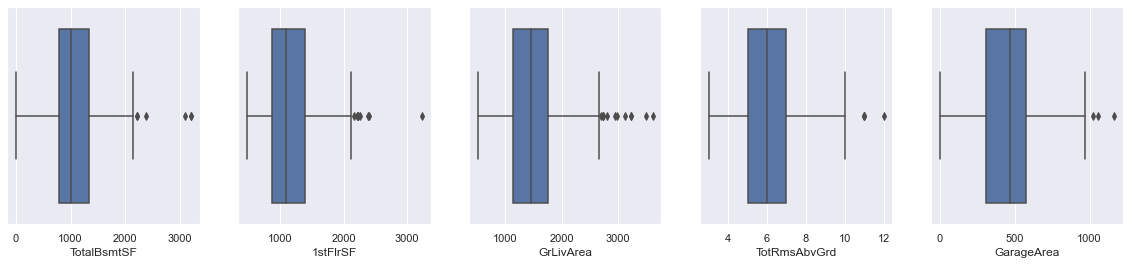

In [89]:
#Plot Boxplots to identify whether it exists outliers
fig, ax =plt.subplots(1,5, figsize=(20,4))
sns.boxplot(house.TotalBsmtSF, ax=ax[0]);
sns.boxplot(house["1stFlrSF"], ax=ax[1]);
sns.boxplot(house.GrLivArea, ax=ax[2]);
sns.boxplot(house.TotRmsAbvGrd, ax=ax[3]);
sns.boxplot(house.GarageArea, ax=ax[4]);


<p>It is observable that outliers exists in the above 5 key variables therefore we made transforation for it

In [90]:
def outliers_remove(data_col):
    q1, q3= np.percentile(data_col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    return (lower_bound,upper_bound)

In [91]:
#Remove outliers
cols=['TotalBsmtSF', '1stFlrSF','GrLivArea', 'TotRmsAbvGrd', 'GarageArea']
for i in cols:
    l=outliers_remove(house[i])[0]
    u=outliers_remove(house[i])[1]
    house.drop(house[(house[i]<l) & (house[i]>u)].index,inplace=True)
house.reset_index(drop=True, inplace=True)

<p>Also we would like to check the skewness of the varaible since a normal distribution plot are usually perform much better in regression type model

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


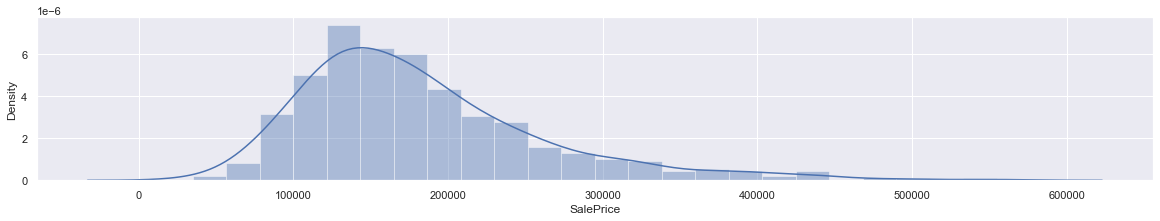

In [92]:
fig, ax = plt.subplots(1,1, figsize=(20,3))
sns.distplot(house.SalePrice)
plt.show()

<p>It is observable that the variable are left skewed so transformation need to be performed

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

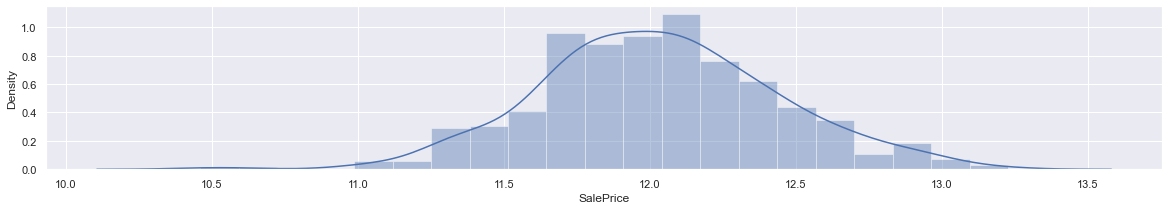

In [93]:
house["SalePrice"] = np.log1p(house["SalePrice"])
fig, ax =plt.subplots(1,1, figsize=(20,3))
sns.distplot(house.SalePrice)


<p>Remove skewness for other varaibles

In [94]:
#When the skewness is greater than 1 make transformartion
skewness=house.skew(axis=0)
cols=skewness[skewness.abs()>1].index
for i in cols:
    house[i]=np.log1p(house[i])

<h3>Feature Enginnering

In [95]:
#Adding new variables
house['TotalLot']=house['LotFrontage']+house['LotArea']
house['TotalArea']=house['TotalBsmtSF']+house['1stFlrSF']+house['2ndFlrSF']
house['FloorArea']=house['1stFlrSF']+house['2ndFlrSF']
house['MisArea']=house['GarageArea']+house['WoodDeckSF']+house['OpenPorchSF']

<p>perform <b>lasso regression</b> to check features importance

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0803020757165855, tolerance: 0.008353987413091615
  positive)


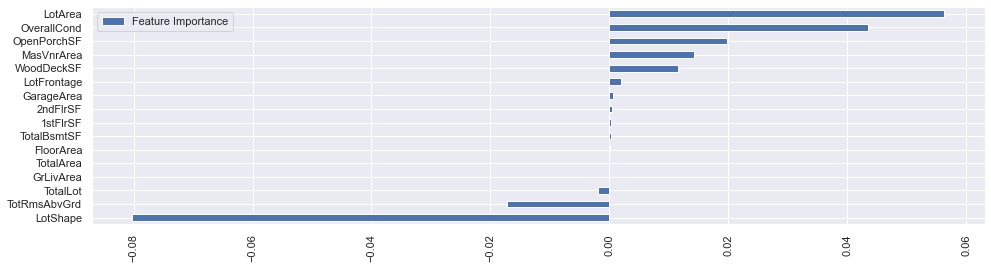

In [96]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.001)
X=house.drop("SalePrice", axis=1)
y=house['SalePrice']
lasso_model.fit(X,y)
import_lasso = pd.DataFrame({"Feature Importance":lasso_model.coef_}, index=house.drop(["SalePrice"],axis=1).columns) 
import_lasso.sort_values("Feature Importance",ascending=False)
import_lasso[import_lasso["Feature Importance"] !=0 ].sort_values("Feature Importance").plot(kind="barh",figsize=(16,4), color='b')
plt.xticks(rotation=90)
plt.show()  

<p>From the above plot we can see that <b><i>LotArea</b><i> occupied an important role in predicting the final SalePrice

<h3>Modelling and Evaluation

<p>We apply <b>MSE</b> for the model scoring

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn import tree
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import statistics as stat
import numpy as np

<p>5 fold CV will be performed in the follow

In [98]:
#Add Fold Lable in the X_train
house['kFold'] = np.random.randint(1, 6, house.shape[0])
rng = np.random.RandomState(0)


<p>We would apply models:<br>
1.linear regression<br>
2.ridge regression<br>
3.LASSO regression<br> 
4.partial least squares<br>
5.regression tree<br>
6.random forests<br>
7.boosting

In [99]:
models = [LinearRegression(),Ridge(),Lasso(),PLSRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
names = ["Linear Regresssion", "Ridge Regression", "Lasso Regreesion", "Partial Least Squares","Regression tree","Random Forests"]


In [100]:
#Define a function for writing MSE
def MSE(Model,house):
    MSE_k=np.zeros(shape=(5,1))
    all_n_k=np.zeros(shape=(5,1))

    for k in range(1,6):
        train_data = house[house['kFold']==k]
        test_data = house[house['kFold']!=k]
        test_data=test_data.drop(["kFold"], axis=1)
        train_data=train_data.drop(["kFold"], axis=1)

        #Find x/y train test data
        X_train=train_data.drop("SalePrice", axis=1)
        X_test=test_data.drop("SalePrice", axis=1)

        y_train=train_data['SalePrice']
        y_test=test_data['SalePrice']

        linear = Model.fit(X_train, y_train)
        predict_y=linear.predict(X_test)
        
        if len(predict_y.shape) == 2: predict_y=predict_y.flatten()

        MSE_k[k-1]= stat.mean((y_test -  predict_y)**2)
        all_n_k[k-1] = len(y_test)
    
    return(sum(MSE_k*all_n_k/(len(house))))

In [101]:
print("LinearRegression: ",MSE(LinearRegression(),house))
print("RidgeRegression: ",MSE(Ridge(),house))
print("LassoRegression: ",MSE(Lasso(),house))
print("PLSRegression: ",MSE(PLSRegression(),house))
print("RegressionTree: ",MSE(DecisionTreeRegressor(),house))
print("RandomForest: ",MSE(RandomForestRegressor(),house))
print("Boosting: ",MSE(GradientBoostingRegressor(),house))

LinearRegression:  [0.15592699]
RidgeRegression:  [0.15468099]
LassoRegression:  [0.16582805]
PLSRegression:  [0.14988319]
RegressionTree:  [0.30950423]
RandomForest:  [0.17681433]
Boosting:  [0.17974432]


<p>From the above result,we are able to find that regression based model perform slighly better than tree based model

<h3>Hyperparameters tuning

<p>Perform hyperparameters tuning in order to maximise the model performance

In [102]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [103]:
#Apply Ridge Regression for Hyperparameters tuning
i=0.1
ridge_score=pd.DataFrame(columns=['alpha','rmse_score','rmse_std'])
X=house.drop("SalePrice",axis=1)
y=house.SalePrice
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.55, random_state=rng) 

for j in range(1,18):
    model=Ridge(alpha=i,max_iter=10000)
    score = rmse_cv(model, X_train, y_train)
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    i=i+0.05
    ridge_score=ridge_score.append({'alpha': i, 'rmse_score': score.mean(), 'rmse_std': score.std()}, ignore_index=True)
    

#Find the best alpha
ridge_score[ridge_score['rmse_score']==ridge_score['rmse_score'].min()]

,alpha,rmse_score,rmse_std
4,0.35,0.183347,0.028176


In [104]:
#Apply Lasso Regression for Hyperparameters tuning
i=0.1
lasso_score=pd.DataFrame(columns=['alpha','rmse_score','rmse_std'])

for j in range(1,18):
    model=Lasso(alpha=i,max_iter=10000)
    score = rmse_cv(model, X_train, y_train)
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    i=i+0.05
    lasso_score=lasso_score.append({'alpha': i, 'rmse_score': score.mean(), 'rmse_std': score.std()}, ignore_index=True)
    
#Find the best alpha
lasso_score[lasso_score['rmse_score']==lasso_score['rmse_score'].min()]


,alpha,rmse_score,rmse_std
16,0.95,0.193343,0.023621


In [105]:
#Apply for PLS model
PLS_score=pd.DataFrame(columns=['n_component','rmse_score','rmse_std'])

for j in range(1,10):
    model=PLSRegression(n_components=j)
    score = rmse_cv(model, X_train, y_train)
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    PLS_score=PLS_score.append({'n_component': j, 'rmse_score': score.mean(), 'rmse_std': score.std()}, ignore_index=True)
    
#Find the best n_component
PLS_score[PLS_score['rmse_score']==PLS_score['rmse_score'].min()]

,n_component,rmse_score,rmse_std
1,2.0,0.180591,0.027214


In [106]:
#Apply for decision tree
DT_score=pd.DataFrame(columns=['max_depth','rmse_score','rmse_std'])

for j in range(1,10):
    model=DecisionTreeRegressor(max_depth=j)
    score = rmse_cv(model, X_train, y_train)
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    DT_score=DT_score.append({'max_depth': j, 'rmse_score': score.mean(), 'rmse_std': score.std()}, ignore_index=True)
    
#Find the best n_component
DT_score[DT_score['rmse_score']==DT_score['rmse_score'].min()]

,max_depth,rmse_score,rmse_std
4,5.0,0.234258,0.042939


In [107]:
#Apply for random Forest
RF_score=pd.DataFrame(columns=['max_depth','rmse_score','rmse_std'])

for j in range(1,10):
    model=DecisionTreeRegressor(max_depth=j)
    score = rmse_cv(model, X_train, y_train)
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    RF_score=RF_score.append({'max_depth': j, 'rmse_score': score.mean(), 'rmse_std': score.std()}, ignore_index=True)
    
#Find the best n_component
RF_score[RF_score['rmse_score']==RF_score['rmse_score'].min()]

,max_depth,rmse_score,rmse_std
5,6.0,0.232115,0.043539


<h3>Ensemble model by stacking

In [148]:
#models = [LinearRegression(),Ridge(alpha=0.15),Lasso(alpha=0.95),PLSRegression(n_components=2),DecisionTreeRegressor(),RandomForestRegressor(),Boosting()]
#models = [LinearRegression(),Ridge(alpha=0.15),Lasso(alpha=0.95),DecisionTreeRegressor(),RandomForestRegressor()]
from sklearn.ensemble import StackingRegressor

r1=LinearRegression()
r2=Ridge(alpha=0.35)
r3=Lasso(alpha=0.95)
r4=PLSRegression(n_components=2)
r5=DecisionTreeRegressor(max_depth=5)
r6=RandomForestRegressor(max_depth=6)
r7=GradientBoostingRegressor()
combine_model = StackingRegressor(estimators=[('lr', r1), ('RR', r2),('LR', r3),('PLS', r4),('DT', r5),('RF', r6),('B', r7)])


In [149]:
house['kFold'] = np.random.randint(1, 6, house.shape[0])
rng = np.random.RandomState(0)

MSE_k=np.zeros(shape=(5,1))
all_n_k=np.zeros(shape=(5,1))

for k in range(1,6):
    train_data = house[house['kFold']==k]
    test_data = house[house['kFold']!=k]
    test_data=test_data.drop(["kFold"], axis=1)
    train_data=train_data.drop(["kFold"], axis=1)

    #Find x/y train test data
    X_train=train_data.drop("SalePrice", axis=1)
    X_test=test_data.drop("SalePrice", axis=1)

    y_train=train_data['SalePrice']
    y_test=test_data['SalePrice']

    linear = combine_model.fit(X_train, y_train)
    predict_y=linear.predict(X_test)

    #if len(predict_y.shape) == 2: predict_y=predict_y.flatten()

    MSE_k[k-1]= stat.mean((y_test -  predict_y)**2)
    all_n_k[k-1] = len(y_test)

print(sum(MSE_k*all_n_k/(len(house))))

[0.14393]


We can conclude that after stacking the model performance is the best

<h3>STAT 4011 Project 2 Part 2 - Titanic Prediction</h2>

In [110]:
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [111]:
#Sorting missing value
miss_titanic = titanic.isnull().sum()
miss_titanic[miss_titanic>0].sort_values(ascending=False)

Age         102
Embarked      1
dtype: int64

<p>We found that we have two variables that contain missing value:<p><b><i>Age</b></i> and <b><i>Embarked</b></i>

<p>Since <b><i>Embarked</b></i> are only one missing replace by mode for simplicity

In [112]:
#Replace by mean / mode value
#titanic["Age"]=titanic.Age.fillna(titanic.Age.mean())

titanic.Embarked[titanic.Embarked.isnull()] = titanic.Embarked.dropna().mode().values

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<p>For example, a 10-year-old child could not have any spouse or sibings therefore use <b><i>Parch</b></i> and 
<b><i>SibSp</b></i> as an variable for predicting age

In [113]:
# Then Apply linear regression for handling missing value
train_data=titanic[titanic.Age.notnull()]
test_data=titanic[titanic.Age.isnull()]

X_train_data=train_data[['SibSp','Survived']]
y_train_data=train_data.Age

X_test_data=test_data[['SibSp','Survived']]
y_test_data=test_data.Age

linear = LinearRegression().fit(X_train_data, y_train_data)
predict_y=linear.predict(X_test_data)

#Fill in NA by predicted value
titanic.loc[titanic.Age.isnull(), 'Age'] = predict_y       

In [114]:
#Sorting missing value again
miss_titanic = titanic.isnull().sum()
miss_titanic[miss_titanic>0].sort_values(ascending=False)

Series([], dtype: int64)

<h3>Data Modification


In [115]:
#Convert Sex into 0 and 1
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})

In [116]:
#Convert Embarked to dummy variable
dummy=pd.get_dummies(titanic['Embarked'])
titanic=pd.concat([titanic, dummy], axis=1)

In [117]:
#Convert 1st class 2nd class 3rd class as seperate variable
dummy=pd.get_dummies(titanic['Pclass'],columns=['1stClass','2ndClass','3rdClass'])
titanic=pd.concat([titanic, dummy], axis=1)

In [118]:
#Plotting a correlation plot to show the variable relationship
corr = titanic.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
PassengerId,1.000000,0.027538,-0.080562,-0.009973,0.069596,-0.072245,-0.029669,0.038574,-0.020419,-0.037355,0.041708,0.064898,0.029036,-0.078974
Survived,0.027538,1.000000,-0.252978,0.575127,-0.105456,-0.049122,0.077264,0.209444,0.132401,0.080820,-0.166886,0.206564,0.085430,-0.245636
Pclass,-0.080562,-0.252978,1.000000,-0.106758,-0.329465,0.112139,0.003289,-0.584160,-0.274606,0.205632,0.106629,-0.881387,-0.203270,0.915852
Sex,-0.009973,0.575127,-0.106758,1.000000,-0.116439,0.074790,0.163150,0.190656,0.106479,0.091916,-0.151485,0.079295,0.052377,-0.110355
Age,0.069596,-0.105456,-0.329465,-0.116439,1.000000,-0.446141,-0.281651,0.048010,0.074459,-0.012463,-0.056692,0.311987,0.022199,-0.283382
SibSp,-0.072245,-0.049122,0.112139,0.074790,-0.446141,1.000000,0.442852,0.186841,-0.075267,0.001031,0.064730,-0.059951,-0.103393,0.135754
Parch,-0.029669,0.077264,0.003289,0.163150,-0.281651,0.442852,1.000000,0.274541,-0.059330,-0.117449,0.126906,0.011671,-0.030867,0.015396
Fare,0.038574,0.209444,-0.584160,0.190656,0.048010,0.186841,0.274541,1.000000,0.275274,-0.111373,-0.167691,0.636882,-0.134149,-0.431299
C,-0.020419,0.132401,-0.274606,0.106479,0.074459,-0.075267,-0.059330,0.275274,1.000000,-0.149336,-0.772960,0.325947,-0.118105,-0.180176
Q,-0.037355,0.080820,0.205632,0.091916,-0.012463,0.001031,-0.117449,-0.111373,-0.149336,1.000000,-0.511910,-0.139735,-0.127827,0.223606


<p>From the above correlation plot we can observe that strong correlation exists between <b>Sex</b> and <b>Survived</b> it may because the idea of "Lady First"

<h3>Data Visualization

In [119]:
#Survived Group
survive_titanic=titanic[titanic['Survived']==1]

<AxesSubplot:ylabel='Sex'>

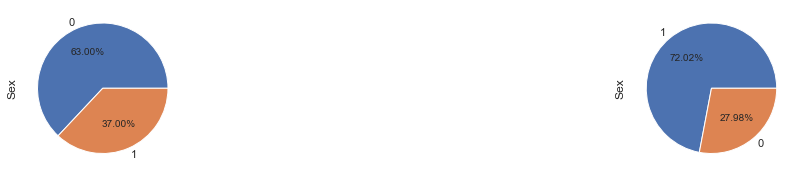

In [120]:
#Sex and Survived
fig, ax = plt.subplots(1,2, figsize=(20,3))
titanic['Sex'].value_counts().plot.pie(autopct = '%1.2f%%',ax=ax[0] )
survive_titanic['Sex'].value_counts().plot.pie(autopct = '%1.2f%%',ax=ax[1])


<p>From the above pie chart it is noticable that Female has a survival rate which proved our assumption in the above

<AxesSubplot:ylabel='Pclass'>

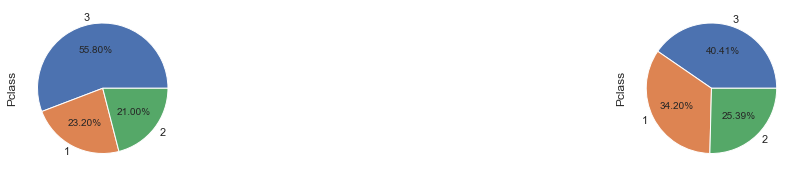

In [121]:
#P Class and Survived
fig, ax = plt.subplots(1,2, figsize=(20,3))
titanic['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%',ax=ax[0])
survive_titanic['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%',ax=ax[1])

<p>From the Figure, it is observable that 1st class passengers has a higher survival rate

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

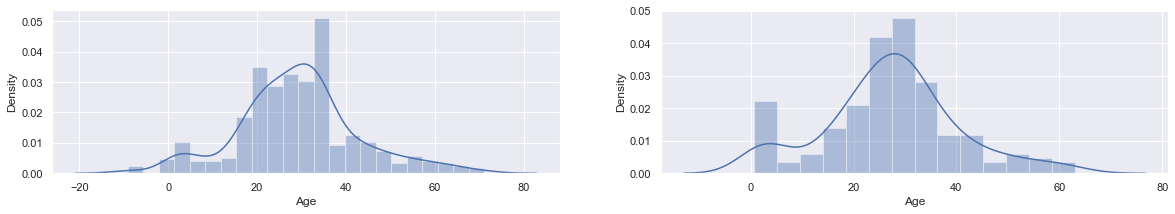

In [122]:
#Survival Age Distribution
fig, ax = plt.subplots(1,2, figsize=(20,3))
sns.distplot(titanic['Age'],ax=ax[0])
sns.distplot(survive_titanic['Age'],ax=ax[1])


<p>From the above plot we can see that people with middle age has a survival rate, also kid has a higher survival rate comparatively

<AxesSubplot:>

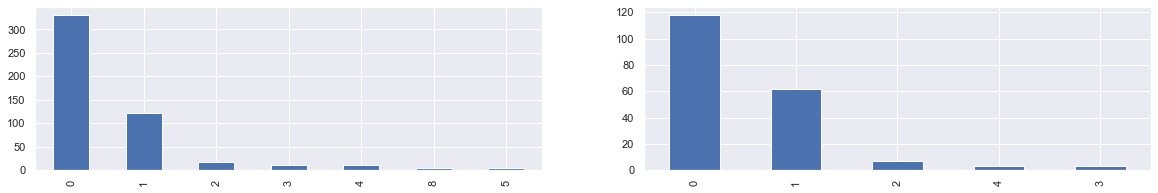

In [123]:
fig, ax = plt.subplots(1,2, figsize=(20,3))
titanic['SibSp'].value_counts().plot.bar(ax=ax[0])
survive_titanic['SibSp'].value_counts().plot.bar(ax=ax[1])

<p>We may conclude that that people have less sibling / spouse have higher possibility to survive

<AxesSubplot:>

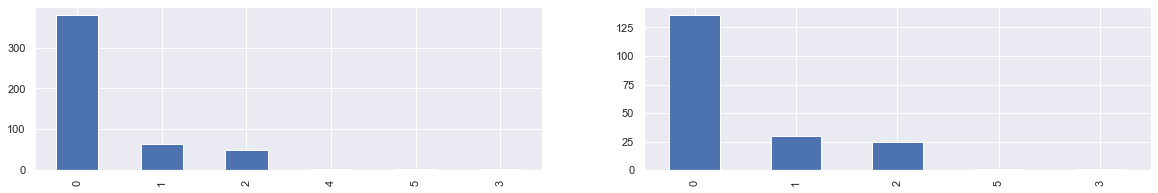

In [124]:
fig, ax = plt.subplots(1,2, figsize=(20,3))
titanic['Parch'].value_counts().plot.bar(ax=ax[0])
survive_titanic['Parch'].value_counts().plot.bar(ax=ax[1])

<p>Also people have no relatives have higher possibility to survive

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

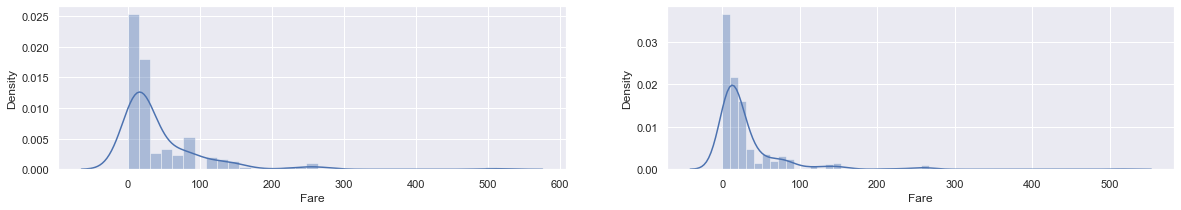

In [125]:
#Survival Fare Distribution
fig, ax = plt.subplots(1,2, figsize=(20,3))
sns.distplot(survive_titanic['Fare'],ax=ax[0])
sns.distplot(titanic['Fare'],ax=ax[1])

<p>We found that the survival rate for the highest fare may not be highest lets go throught

<h3>Feature Enginnering

In [126]:
#Adding Kid features since kids are more likely survive
titanic['kid']=0
titanic.loc[(titanic.Age < 5),  'kid'] = 1

In [127]:
#Since if an adult with 1 kid they are more easily getting survive
titanic['adultwithkid']=0
titanic.loc[(titanic.SibSp == 1),  'adultwithkid'] = 1

In [128]:
#Since if passengers without any relatives, they are more likely to survive
titanic['relatives']=0
titanic.loc[((titanic.SibSp == 0) & (titanic.Parch == 0) ),  'adultwithkid'] = 1

In [129]:
#Since passenger with middle(25-35) age are more likely survive
titanic['young']=0
titanic.loc[(titanic.Age>=25) & (titanic.Age<=35),['young']]=1

In [130]:
#Also Class 1 or 2 citizens are more likely to survive
titanic['wealthy']=0
titanic.loc[(titanic.Pclass==1) | (titanic.Pclass==2),['wealthy']]=1

In [131]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,1,2,3,kid,adultwithkid,relatives,young,wealthy
0,1,0,3,0,22.0,1,0,7.2500,S,0,0,1,0,0,1,0,1,0,0,0
1,2,1,1,1,38.0,1,0,71.2833,C,1,0,0,1,0,0,0,1,0,0,1
2,3,1,3,1,26.0,0,0,7.9250,S,0,0,1,0,0,1,0,1,0,1,0
3,4,1,1,1,35.0,1,0,53.1000,S,0,0,1,1,0,0,0,1,0,1,1
4,5,0,3,0,35.0,0,0,8.0500,S,0,0,1,0,0,1,0,1,0,1,0


<h3>Feature Selection

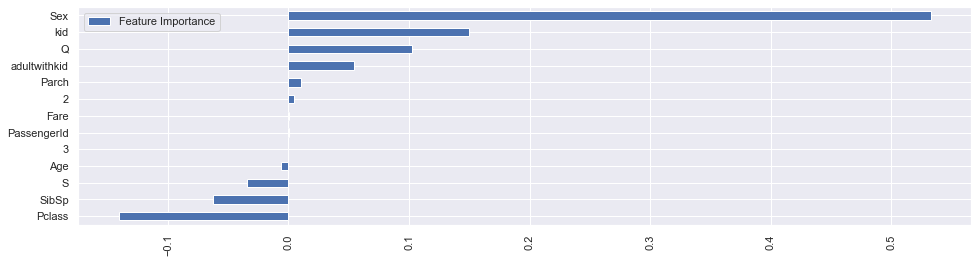

In [132]:
lasso_model=Lasso(alpha=0.001)
X=titanic.drop(["Survived","Embarked"], axis=1)
y=titanic['Survived']
lasso_model.fit(X,y)
import_lasso = pd.DataFrame({"Feature Importance":lasso_model.coef_}, index=titanic.drop(["Survived","Embarked"],axis=1).columns) 
import_lasso.sort_values("Feature Importance",ascending=False)
import_lasso[import_lasso["Feature Importance"] !=0 ].sort_values("Feature Importance").plot(kind="barh",figsize=(16,4), color='b')
plt.xticks(rotation=90)
plt.show()  

<p>The feature selection result quite a good fit with our expectations that Gender is a key factor for the survival rate

<h3>Modelling and Evaluation

<p>Again we apply <b>MSE</b> for the modelling criteria

<p>We would apply models:<br>
1.k-nearest neighbors<br>
2.logistics regression<br>
3.linear discriminant analysis<br> 
4.classification tree<br>
5.random forests<br>
6.boosting<br>
7.Support Vector Machine

In [133]:
#Define a function for writing MSE
def MSE(Model,house):
    MSE_k=np.zeros(shape=(5,1))
    all_n_k=np.zeros(shape=(5,1))

    for k in range(1,6):
        train_data = house[house['kFold']==k]
        test_data = house[house['kFold']!=k]
        test_data=test_data.drop(["kFold"], axis=1)
        train_data=train_data.drop(["kFold"], axis=1)

        #Find x/y train test data
        X_train=train_data.drop('Survived', axis=1)
        X_test=test_data.drop("Survived", axis=1)

        y_train=train_data['Survived']
        y_test=test_data['Survived']

        linear = Model.fit(X_train, y_train)
        predict_y=linear.predict(X_test)
        
        if len(predict_y.shape) == 2: predict_y=predict_y.flatten()

        MSE_k[k-1]= stat.mean((y_test -  predict_y)**2)
        all_n_k[k-1] = len(y_test)
    
    return(sum(MSE_k*all_n_k/(len(house))))

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
#Add Fold Lable in the X_train
titanic['kFold'] = np.random.randint(1, 6, house.shape[0])
titanic=titanic.drop(["Embarked"], axis=1)
rng = np.random.RandomState(0)

In [136]:
#Apply model to perform regression
print("k-nearest neighbors: ",MSE(KNeighborsClassifier(),titanic))
print("logistics regression: ",MSE(LogisticRegression(),titanic))
print("linear discriminant analysis: ",MSE(LinearDiscriminantAnalysis(),titanic))
print("classification tree: ",MSE(tree.DecisionTreeClassifier(),titanic))
print("random forests: ",MSE(RandomForestClassifier(),titanic))
print("Boosting: ",MSE(GradientBoostingClassifier(),titanic))
print("SVM: ",MSE(svm.SVC(),titanic))

k-nearest neighbors:  [1.634]
logistics regression:  [0.83]
linear discriminant analysis:  [0.87]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


classification tree:  [1.242]
random forests:  [0.942]
Boosting:  [1.056]
SVM:  [1.496]


<h3>Hyparameters tuning

<p>Perform Hyparameters tuning to further enhance model performance

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
def accuracy(Model,house):
    
    accuracy_k=np.zeros(shape=(5,1))
    all_n_k=np.zeros(shape=(5,1))   

    for k in range(1,6):
        train_data = house[house['kFold']==k]
        test_data = house[house['kFold']!=k]
        test_data=test_data.drop(["kFold"], axis=1)
        train_data=train_data.drop(["kFold"], axis=1)

        #Find x/y train test data
        X_train=train_data.drop('Survived', axis=1)
        X_test=test_data.drop("Survived", axis=1)

        y_train=train_data['Survived']
        y_test=test_data['Survived']
        
        linear = Model.fit(X_train, y_train)
        predict_y=linear.predict(X_test)
        
        accuracy_k[k-1]=accuracy_score(y_test, predict_y, normalize=False)
        all_n_k[k-1]=len(y_test)
        
    return(sum(accuracy_k*all_n_k/(len(house))))
        

In [139]:
knear_score=pd.DataFrame(columns=['k','MSE'])

for j in range(1,20):
    model=KNeighborsClassifier(n_neighbors=j)
    score = float(MSE(model,titanic))
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    knear_score=knear_score.append({'k': j, 'MSE': score}, ignore_index=True)
    

#Find the best alpha
knear_score[knear_score['MSE']==knear_score['MSE'].min()]

,k,MSE
15,16.0,1.48


In [140]:
score_df=pd.DataFrame(columns=['k','MSE'])

for j in range(1,10):
    model=tree.DecisionTreeClassifier(max_depth=j)
    score = float(MSE(model,titanic))
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    score_df=score_df.append({'k': j, 'MSE': score}, ignore_index=True)
    

#Find the best alpha
score_df[score_df['MSE']==score_df['MSE'].min()]

,k,MSE
0,1.0,0.8


In [141]:
score_df=pd.DataFrame(columns=['k','MSE'])

for j in range(1,10):
    model=RandomForestClassifier(max_depth=j)
    score = float(MSE(model,titanic))
    #print("{}: {:.6f}, {:.4f}".format(i,score.mean(),score.std()))
    score_df=score_df.append({'k': j, 'MSE': score}, ignore_index=True)
    

#Find the best alpha
score_df[score_df['MSE']==score_df['MSE'].min()]

,k,MSE
2,3.0,0.878


<h3>Ensemble models

In [145]:
from sklearn.ensemble import StackingClassifier

r1=KNeighborsClassifier(n_neighbors=16)
r2=LogisticRegression()
r3=LinearDiscriminantAnalysis()
r4=tree.DecisionTreeClassifier(max_depth=1)
r5=RandomForestClassifier(max_depth=3)
r6=GradientBoostingClassifier()
r7=svm.SVC()
combine_model = StackingClassifier(estimators=[('kN', r1), ('LR', r2),('LDA', r3),('DT', r4),('RF', r5),('B', r6),('SVM', r7)])


In [146]:
#Define a function for writing MSE

MSE_k=np.zeros(shape=(5,1))
all_n_k=np.zeros(shape=(5,1))

titanic['kFold'] = np.random.randint(1, 6, house.shape[0])
rng = np.random.RandomState(0)


for k in range(1,6):
    train_data = titanic[titanic['kFold']==k]
    test_data = titanic[titanic['kFold']!=k]
    test_data=test_data.drop(["kFold"], axis=1)
    train_data=train_data.drop(["kFold"], axis=1)

    #Find x/y train test data
    X_train=train_data.drop("Survived", axis=1)
    X_test=test_data.drop("Survived", axis=1)

    y_train=train_data['Survived']
    y_test=test_data['Survived']

    linear = combine_model.fit(X_train, y_train)
    predict_y=linear.predict(X_test)

    if len(predict_y.shape) == 2: predict_y=predict_y.flatten()

    MSE_k[k-1]= stat.mean((y_test -  predict_y)**2)
    all_n_k[k-1] = len(y_test)



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [147]:
print(sum(MSE_k*all_n_k/(len(house))))

[0.81]


From the result we found that the model after stacking performance do not improve, it perform worser than a single model Decision Tree.  This phenomenon may explain by other models performance in the stacking models perform are not good.  And the Single Decision Tree with parameter tuning has the best performance

<h3>Remark</h3><br>
Sorry that original I would like to make ignore warning however I found that once I applied ignore warning my plot are not able to show due to some conflicts. Really sorry about that

<p style="font-size: 16px"><b>Reference</p style="font-size: 16px"></b><br>
<p> 1. https://www.kaggle.com/ogakulov/lotfrontage-fill-in-missing-values-house-prices<br>
    2. https://www.kaggle.com/nikkisharma536/house-prediction-dealing-with-outlier<br>
    3. An Introduction to Statistical Learning, with Application in R. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.